In [1]:
import os
%pwd  # this tell us which path we are currently working , so based on the below output path we are working under the research file
os.chdir("../")  #  but i would like to work with main ProjectML_with_MLFlow file , so for getting i step back in path inorder to enter the main project file i used this command os.chdir("../")
%pwd

'c:\\datascience End to End Projects\\End-to-End-sales-Prediction'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
import pandas  as pd
df=pd.read_csv("C:\\datascience End to End Projects\\End-to-End-sales-Prediction\\artifacts\\data_ingestion\\Train.csv") # this path i got it from the config.yaml file  from the data_validation unzip_data_dir varaible 
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.shape

(8523, 12)

In [6]:
# Checking for duplicated values
df.duplicated().sum()

0

In [7]:
#finding the total number of unique values in each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
categorical_df = df.select_dtypes(include = 'object')
numerical_df = df.select_dtypes(exclude = 'object')

print(f"There are {len(categorical_df.columns)} Categorical Attributes")
print(f"There are {len(numerical_df.columns)} Numerical Attributes")

There are 7 Categorical Attributes
There are 5 Numerical Attributes


In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

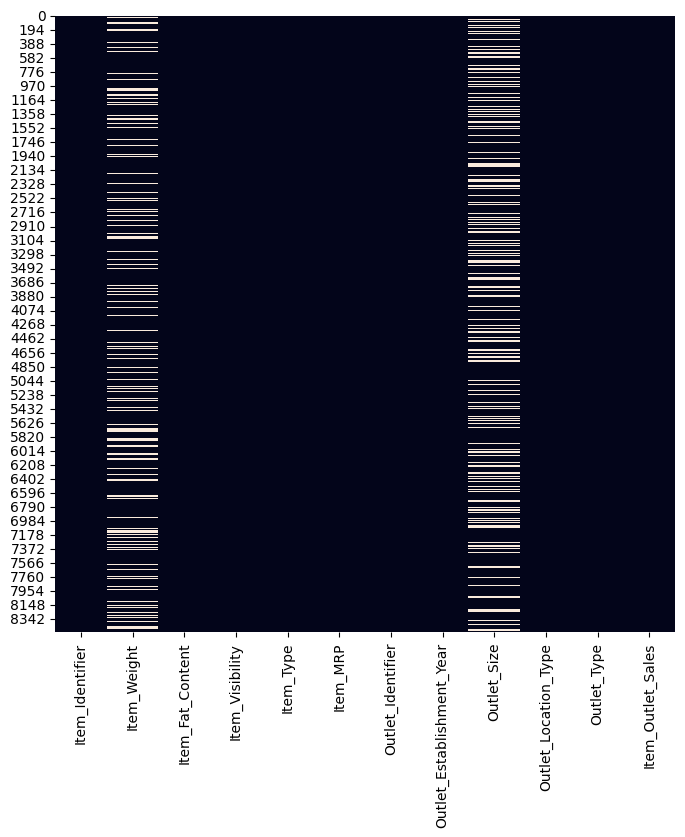

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cbar=False)

In [12]:
## Let's list them out:

total = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending = False)
percent = np.round(percent, 3)
types = df[percent.index].dtypes

missing_data = pd.concat([total, percent, types], axis = 1, keys = ["Total","Percent","Type"])
missing_data.head(5)

,Total,Percent,Type
Outlet_Size,2410,28.276,object
Item_Weight,1463,17.165,float64
Item_Identifier,0,0.000,object
Item_Fat_Content,0,0.000,object
Item_Visibility,0,0.000,float64


In [13]:
df['Item_Weight'].mean()

12.857645184135976

In [14]:
# filling the missing values in "Item_weight column" with "Mean" value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [15]:
df['Item_Weight'].isnull().sum()

0

In [16]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [17]:
mode_of_outlet_size=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0])) #  creates a pivot table summarizing the mode of 'Outlet_Size' for each 'Outlet_Type'. This table shows the most common 'Outlet_Size' for each 'Outlet_Type', helping you fill missing values appropriately based on their group.
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
missing_values=df['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [19]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x]) # is used to select specifically the rows with missing values in the 'Outlet_Size' column., This ensures that only those rows with missing values are modified, leaving other rows intact.

In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

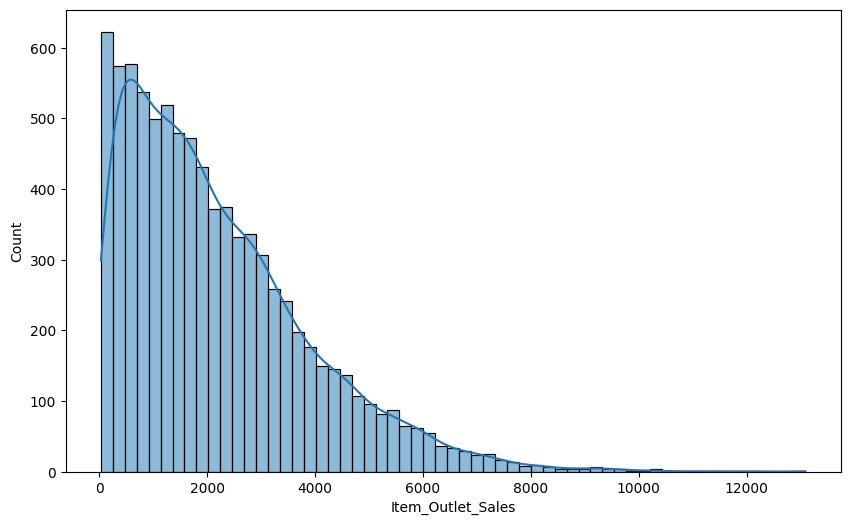

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Item_Outlet_Sales', kde = True);


In [23]:
## First we will remove the outliers from this attribute
## function to remove outlier

def remove_outliers(dataframe, column):
    
    Q3 = dataframe[column].quantile(0.75)
    Q1 = dataframe[column].quantile(0.25)
    
    IQR = Q3 - Q1
    
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    df_no_outlier = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]

    return df_no_outlier

In [24]:
# Removing Outliers form Item_Outlet_Sales

df = remove_outliers(df, "Item_Outlet_Sales")

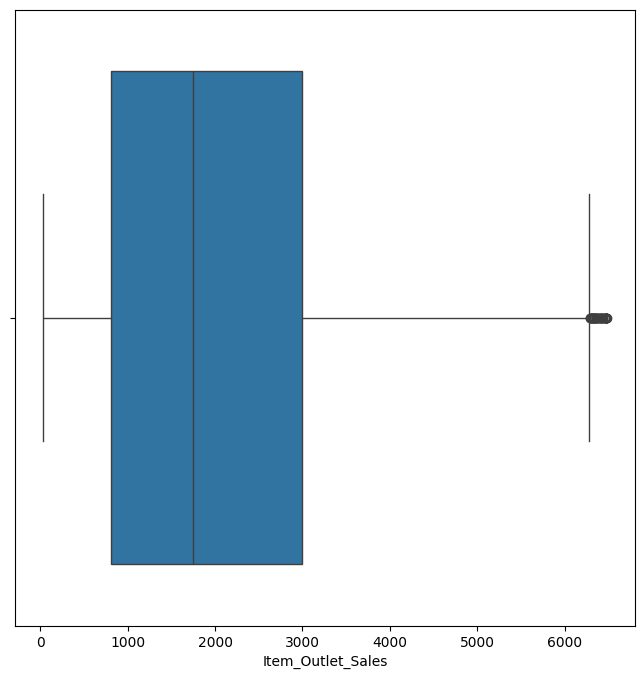

In [25]:
# Quickly checking the result in boxplot

plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Outlet_Sales', data = df);

In [26]:
## Function for fixing positive skewness
def sqrt_transformation(dataframe):
    return np.sqrt(dataframe)

In [27]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].map(sqrt_transformation)

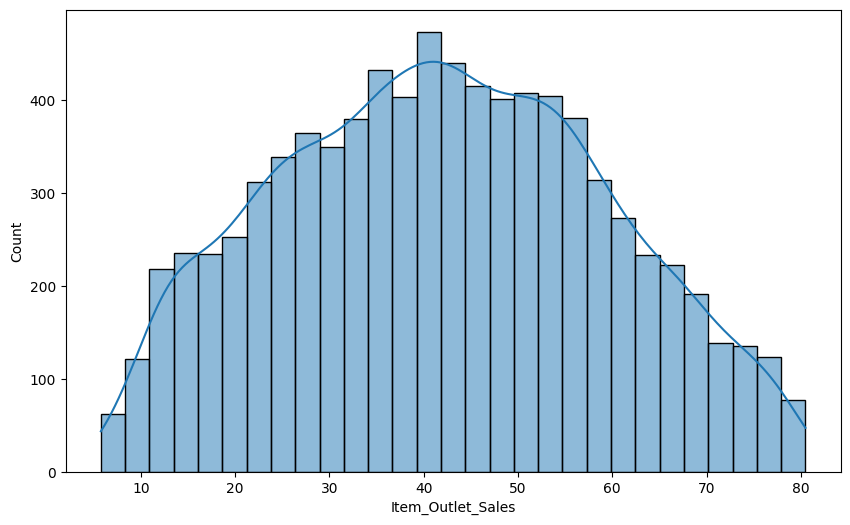

In [28]:
# After fixing skewness

plt.figure(figsize = (10,6))
sns.histplot(data = df, x = 'Item_Outlet_Sales', kde = True);

In [29]:
xdf = df.copy()

In [30]:
numerical_df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

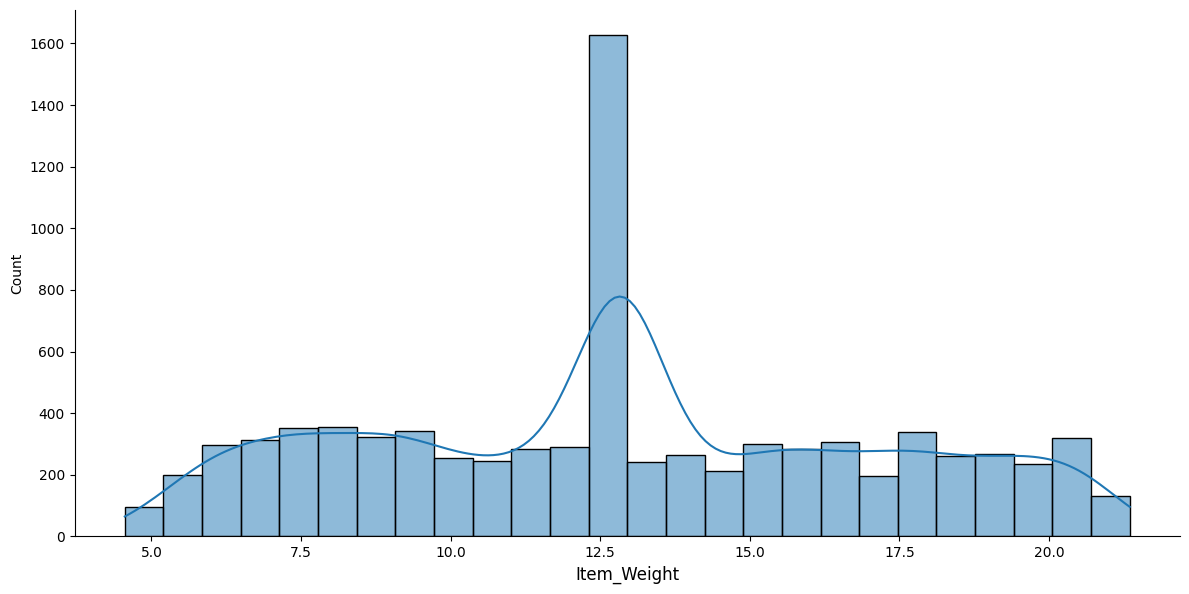

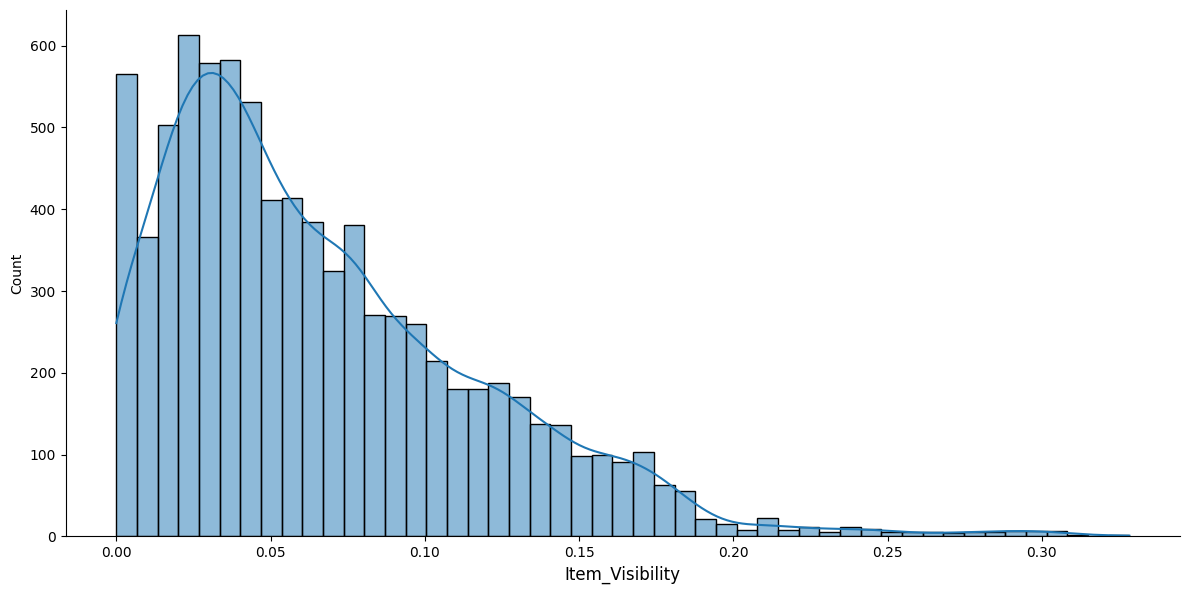

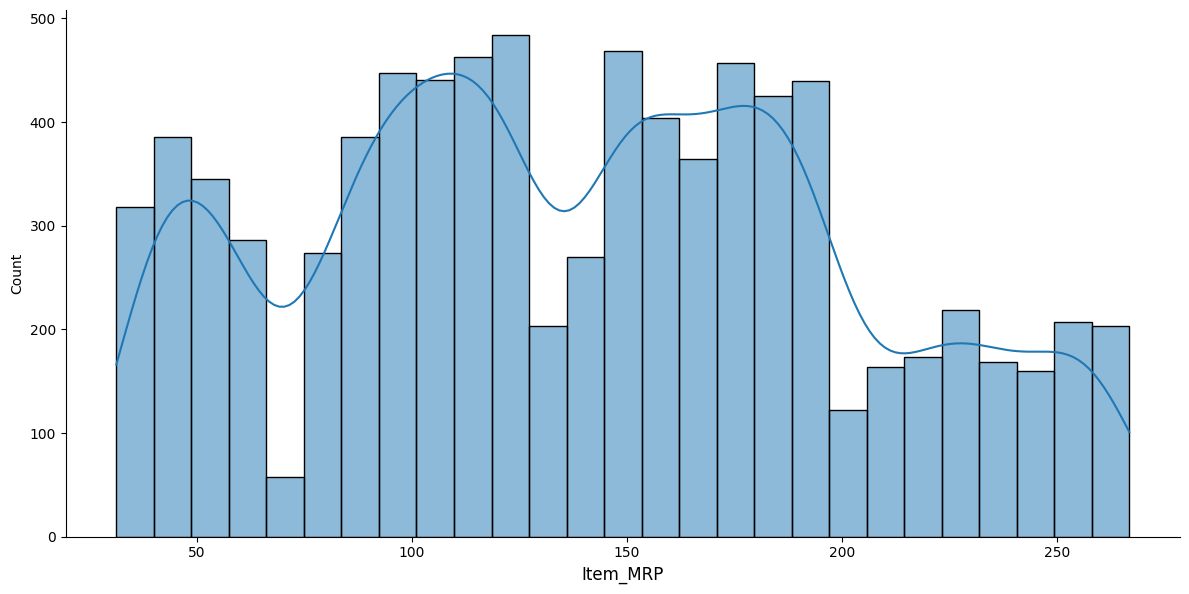

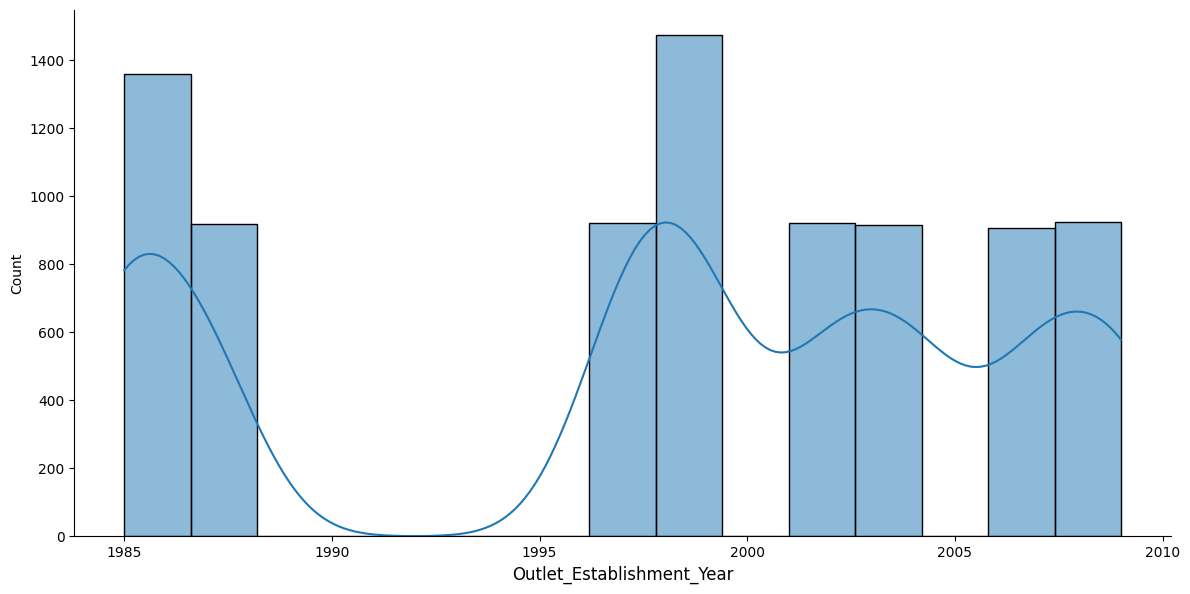

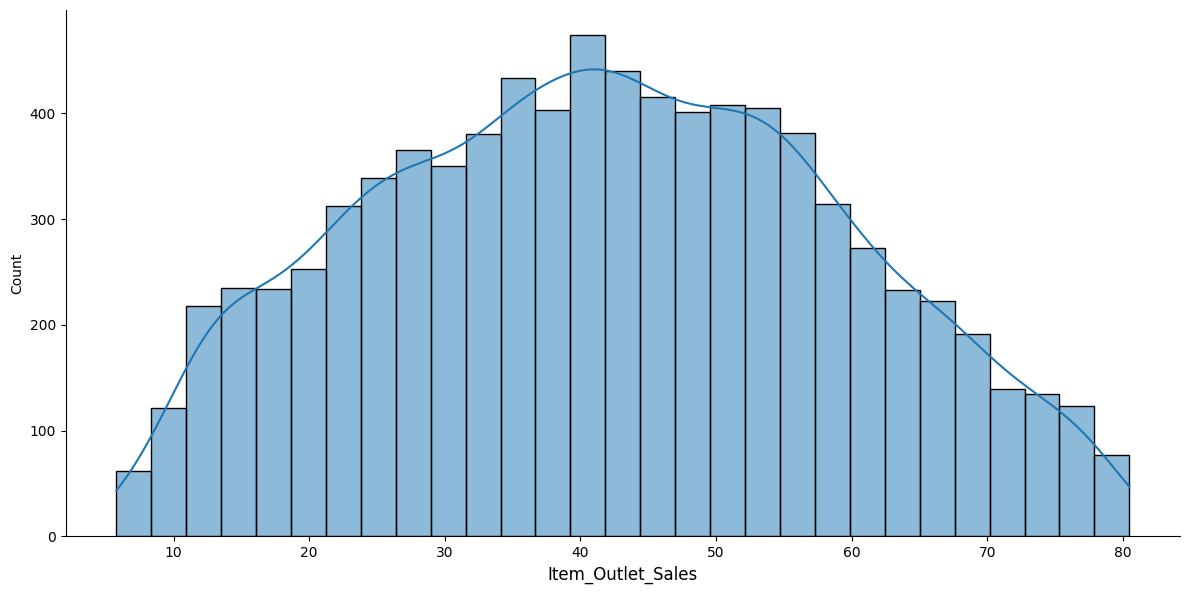

In [31]:
for i in numerical_df:
    sns.displot(data = xdf, x = i, kde = True, aspect = 2, height = 6);
    plt.xlabel(i, fontsize = 12)

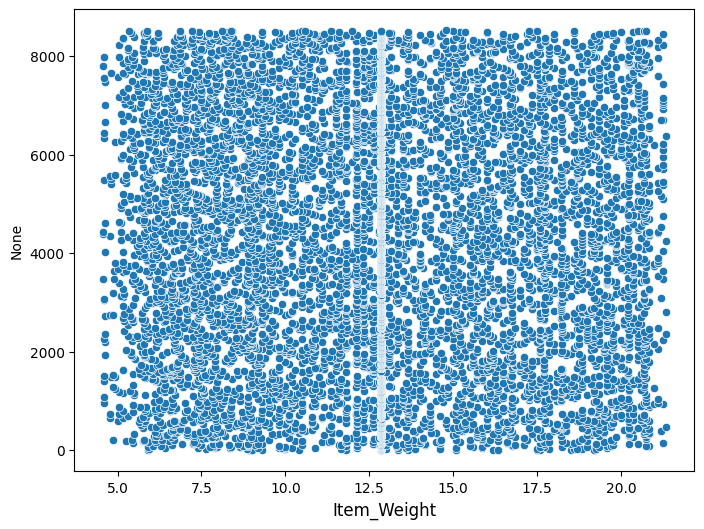

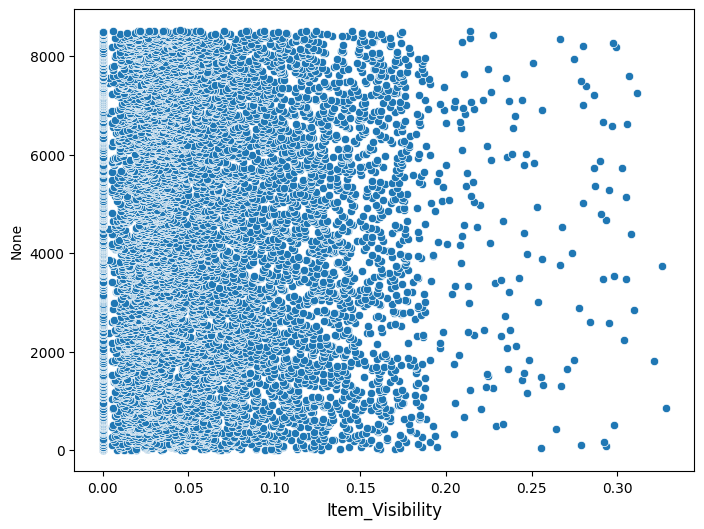

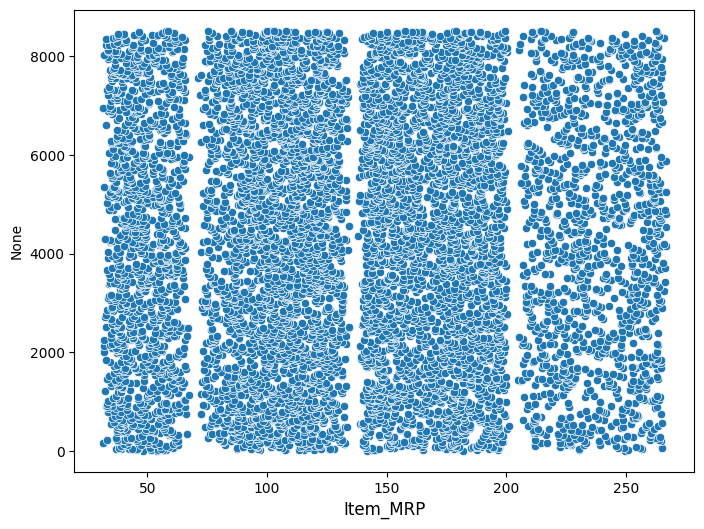

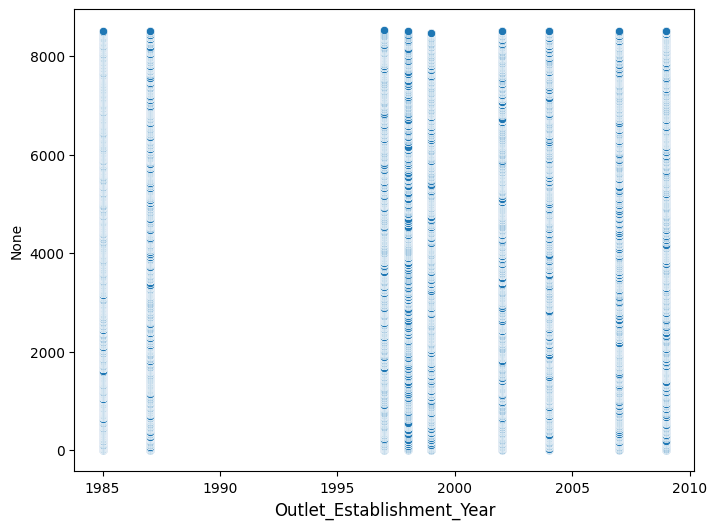

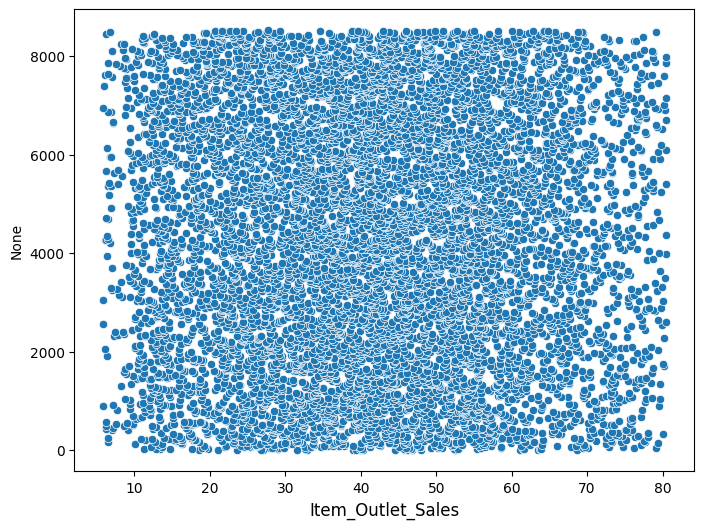

In [32]:
# Checking for outliers

for i in numerical_df:
    plt.figure(figsize =(8,6))
    sns.scatterplot(data = xdf, y = xdf.index, x = i);
    plt.xlabel(i, fontsize = 12)

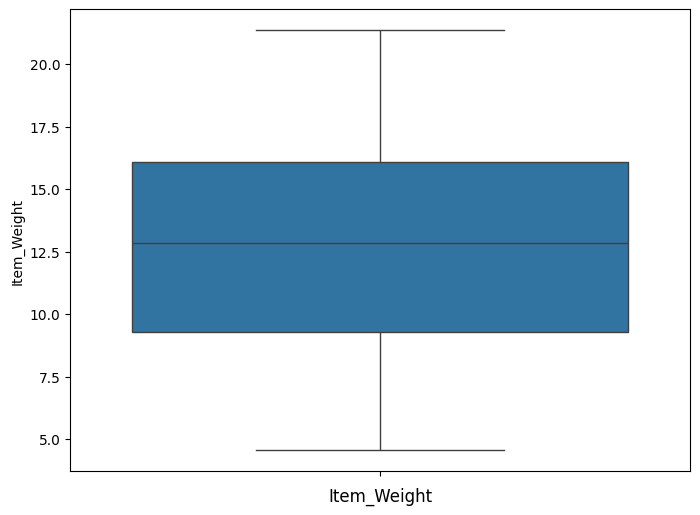

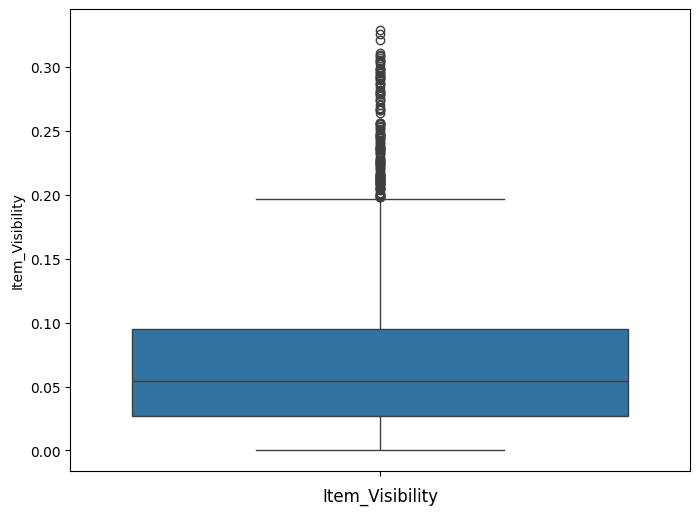

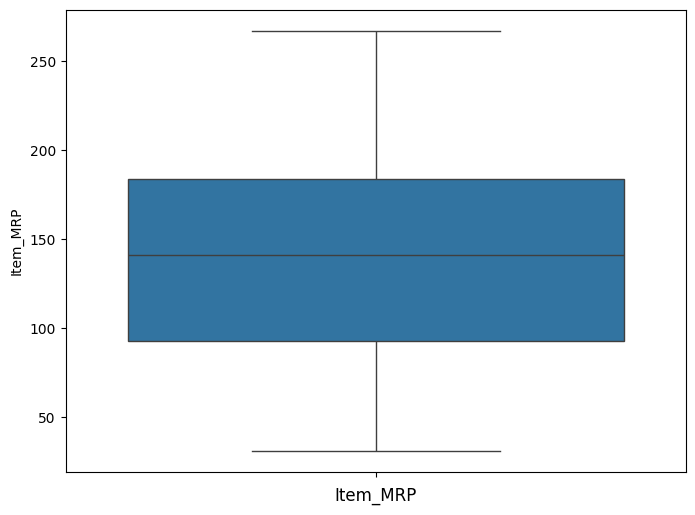

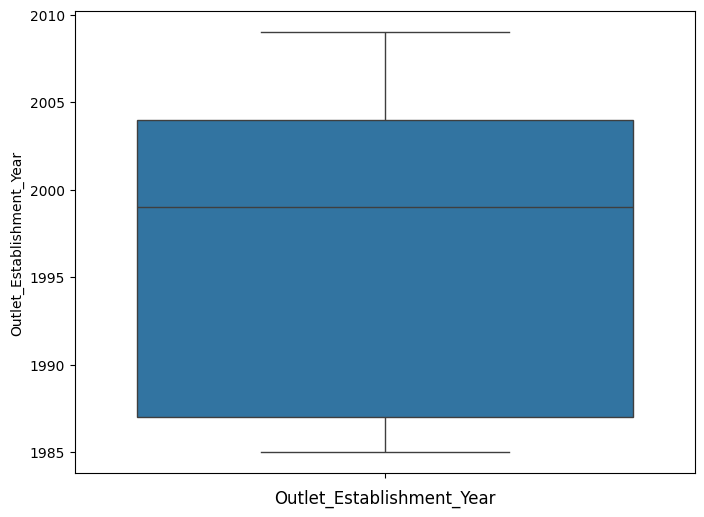

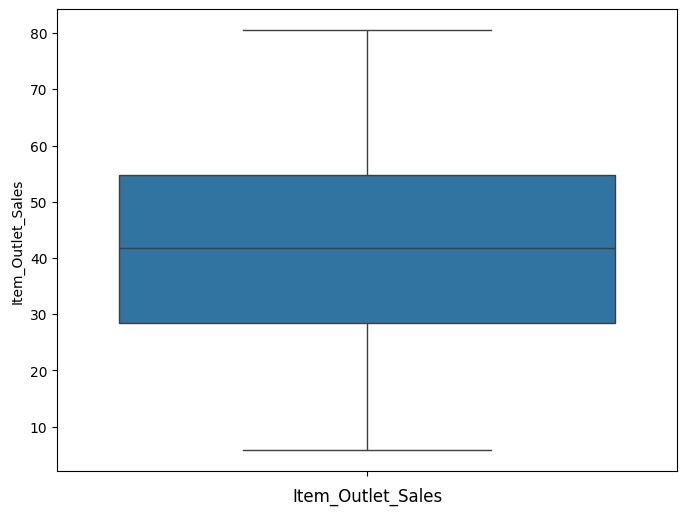

In [33]:
# Confirming the outliers

for i in numerical_df:
    plt.figure(figsize =(8,6))
    sns.boxplot(data = xdf, y = i);
    plt.xlabel(i, fontsize = 12)

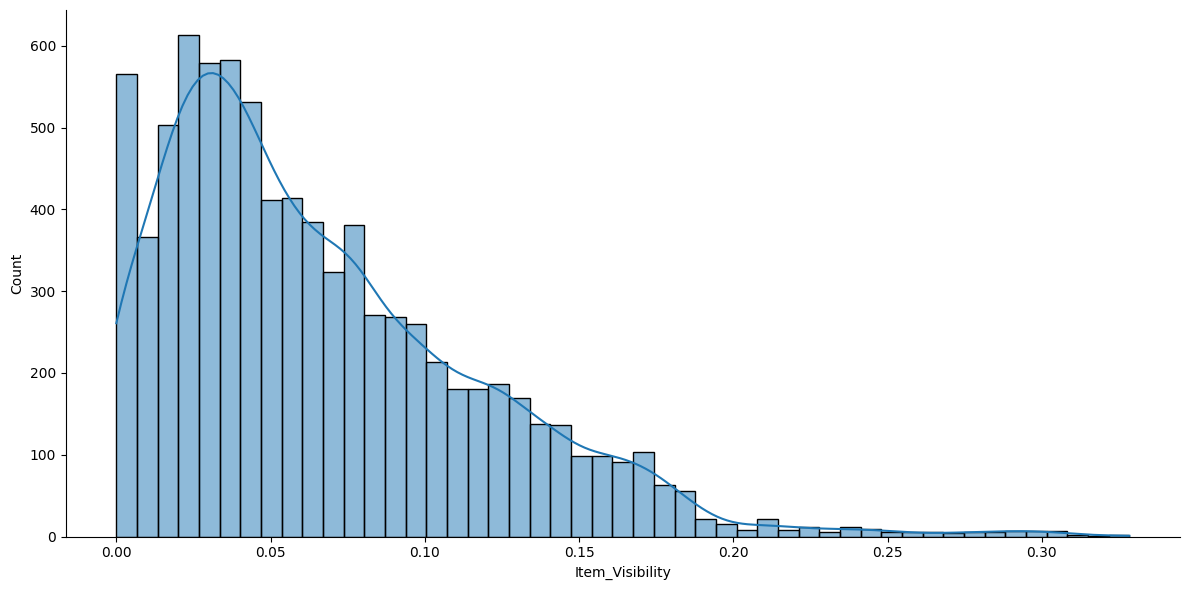

In [34]:
sns.displot(data = xdf, x = 'Item_Visibility', kde = True, aspect = 2, height = 6);

In [35]:
## First Removing strange '0'

xdf['Item_Visibility'].replace(0, xdf['Item_Visibility'].median(), inplace = True)

In [36]:
# Treating Postive skewness

xdf['Item_Visibility'] = xdf["Item_Visibility"].map(sqrt_transformation)

In [37]:
# Removing Outliers

xdf = remove_outliers(xdf, "Item_Visibility")

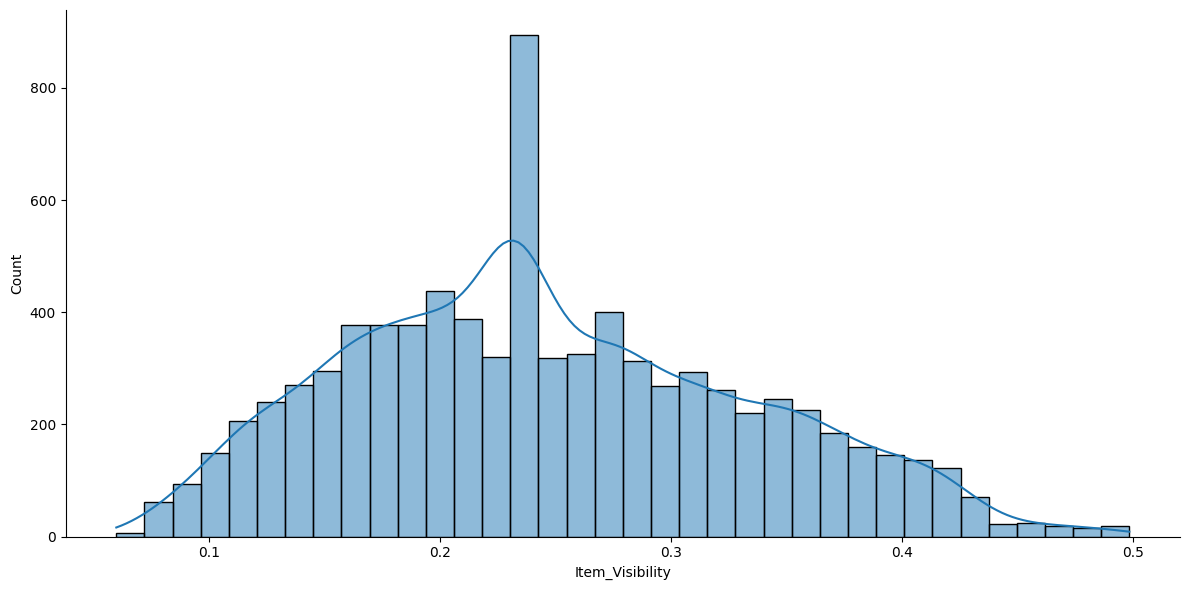

In [38]:
# After remvoing skewness and fixing outliers on trainset

sns.displot(x = 'Item_Visibility', data = xdf, aspect = 2, height = 6, kde = True);

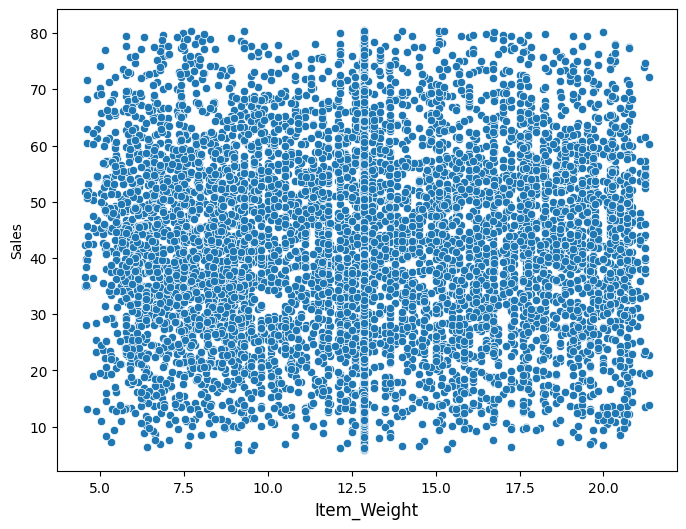

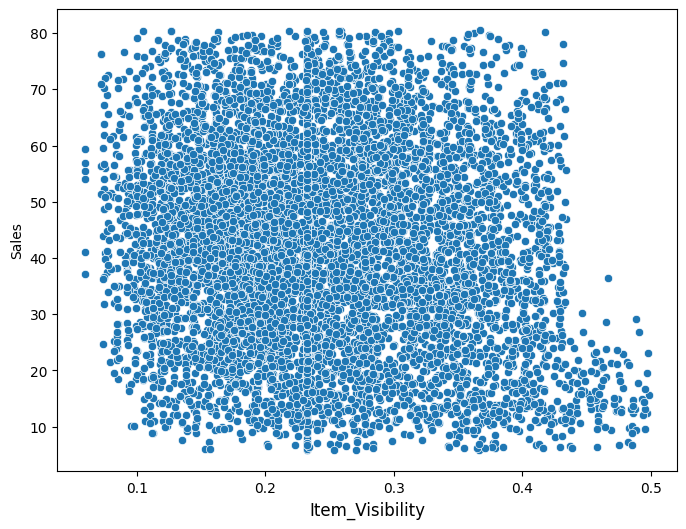

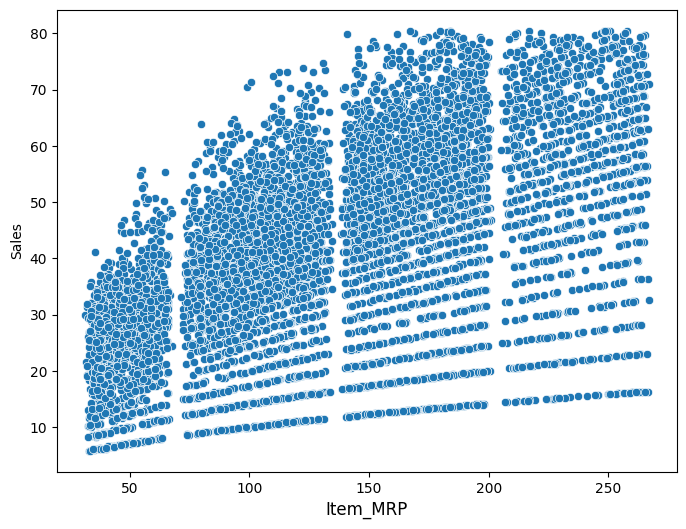

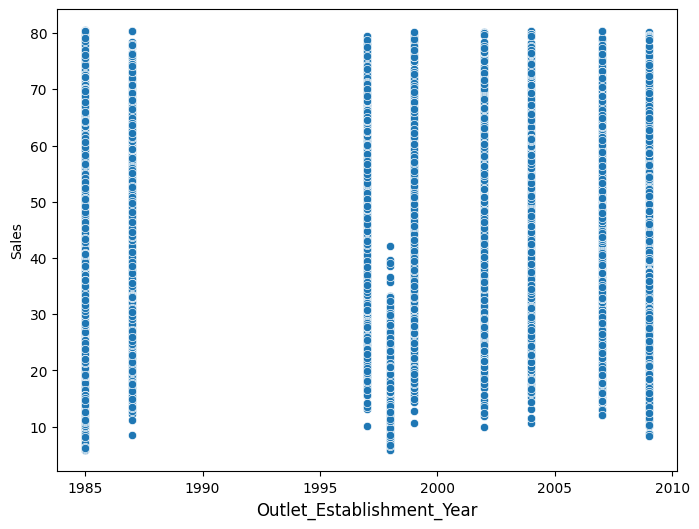

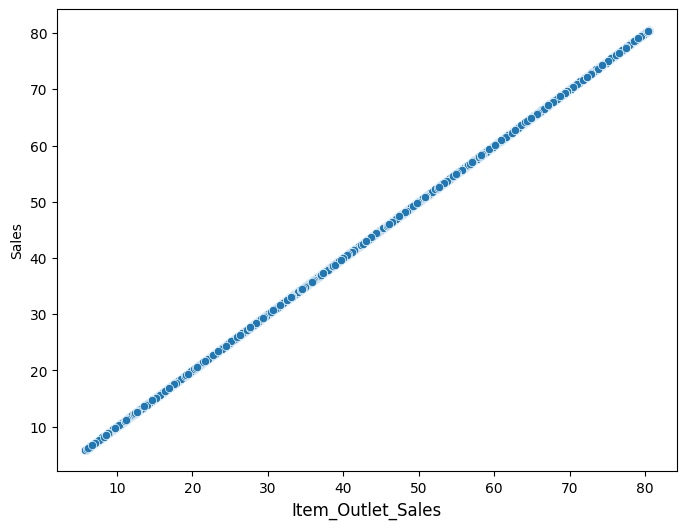

In [39]:
for i in numerical_df:
    plt.figure(figsize =(8,6))
    sns.scatterplot(data = xdf, x = i, y = xdf['Item_Outlet_Sales']);
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Sales")

In [40]:
bi_df = xdf.copy()

In [41]:
categorical_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

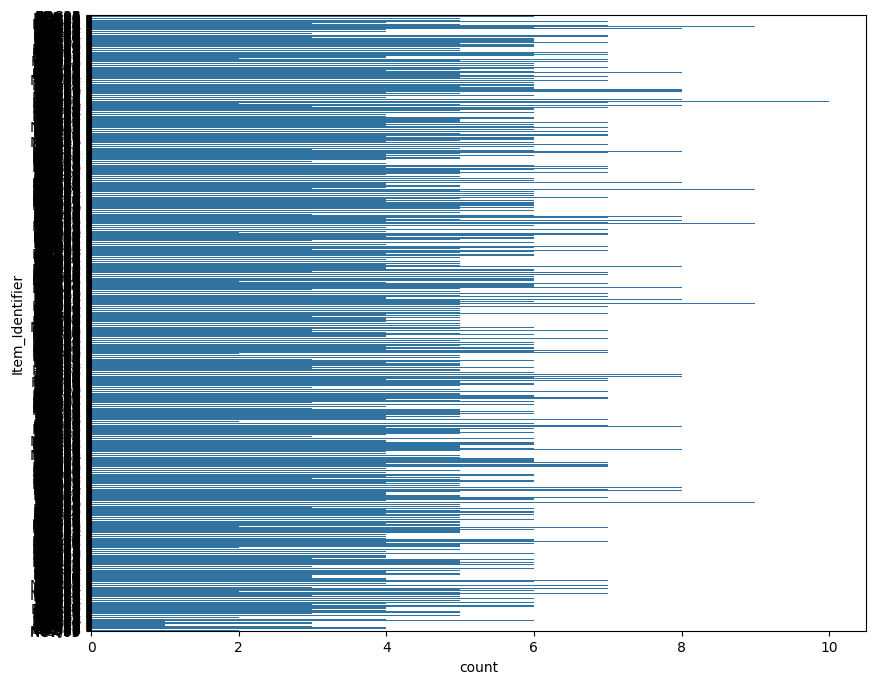

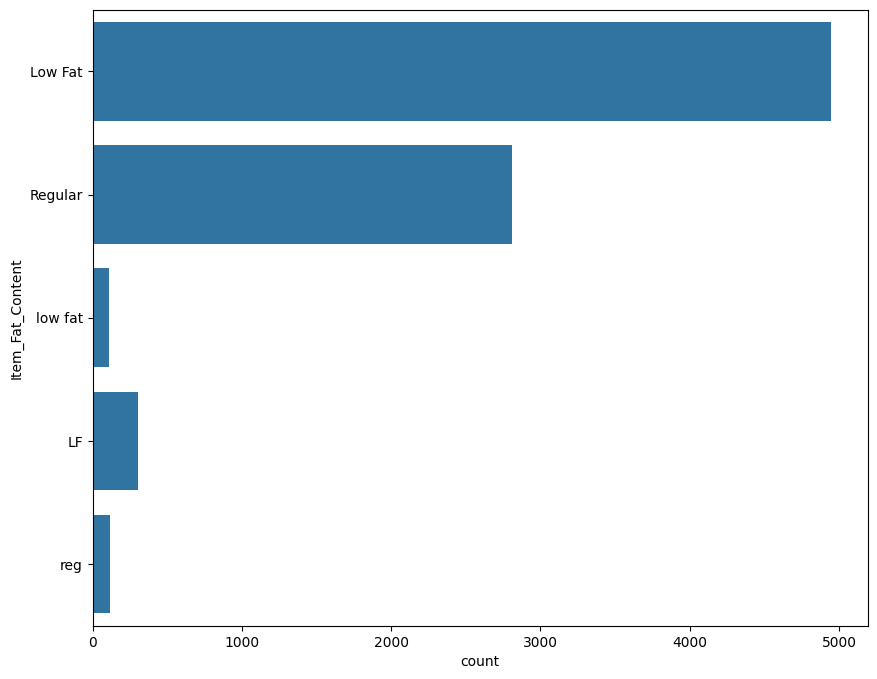

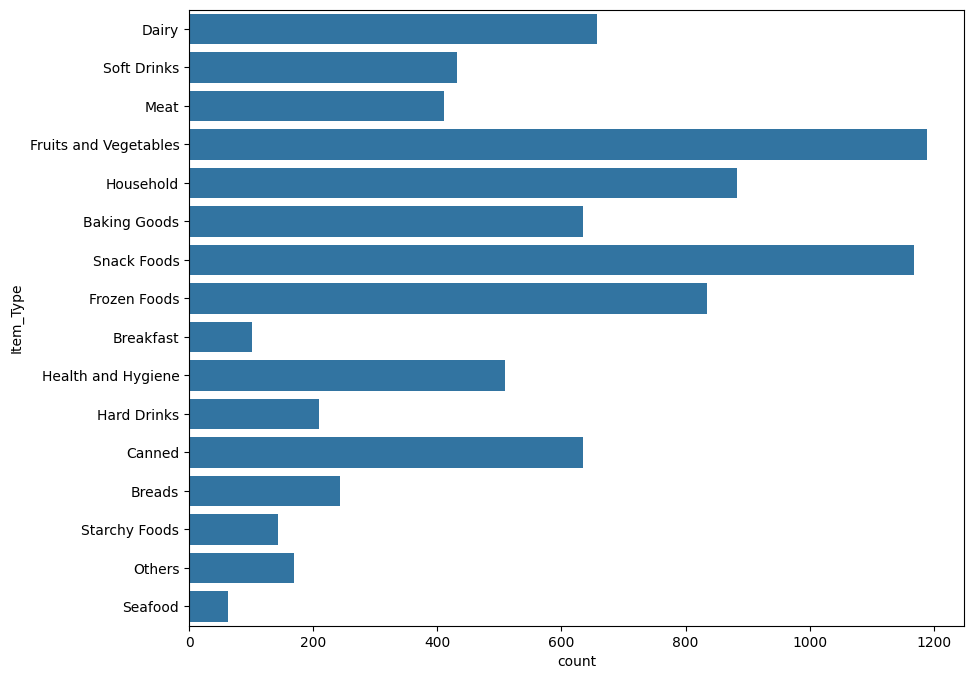

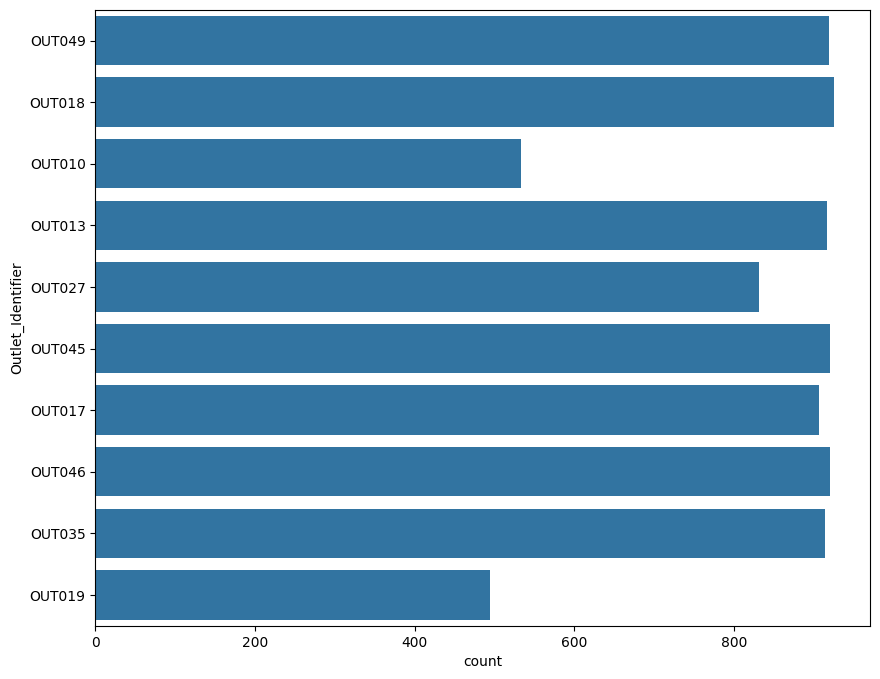

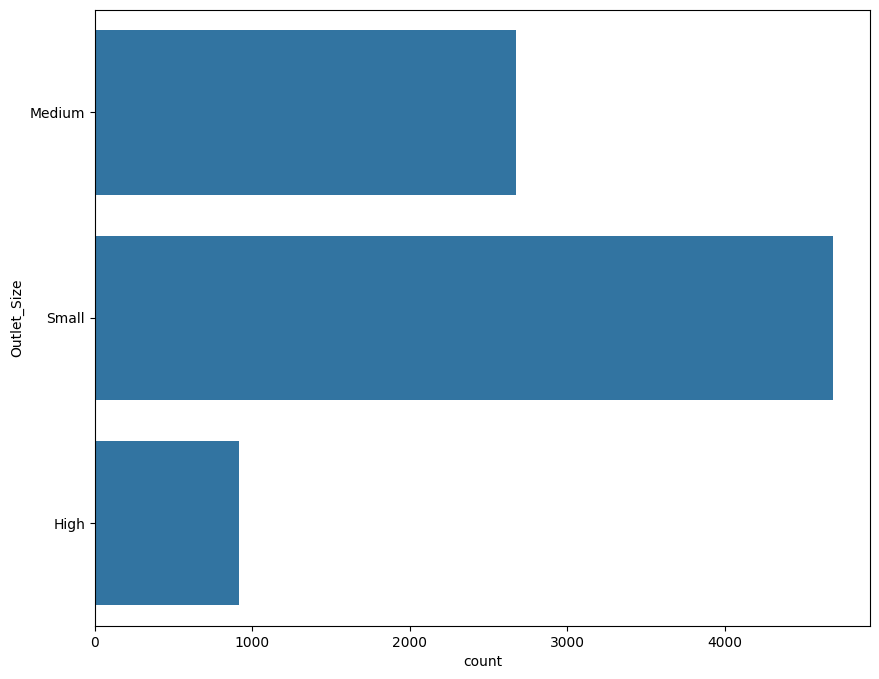

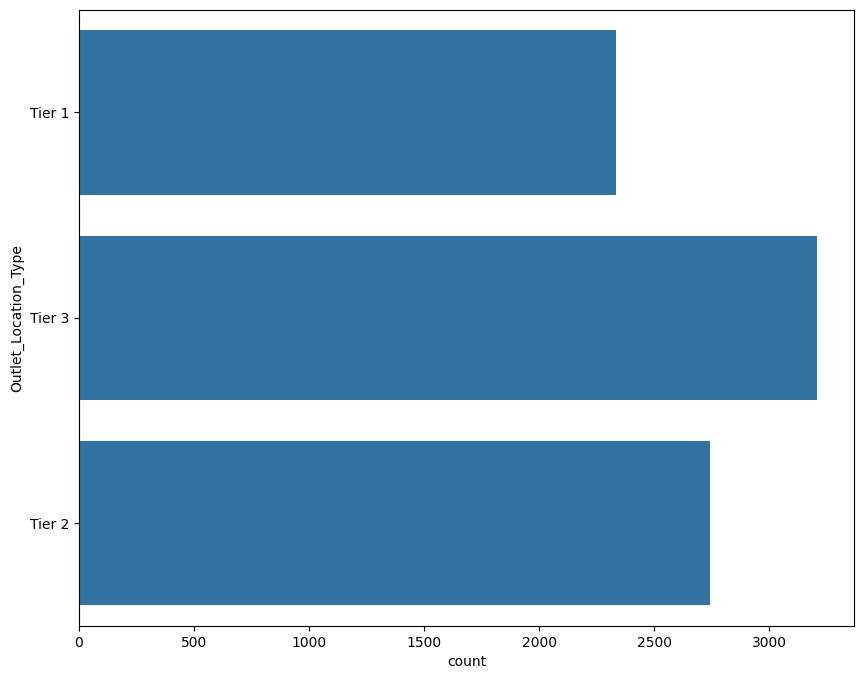

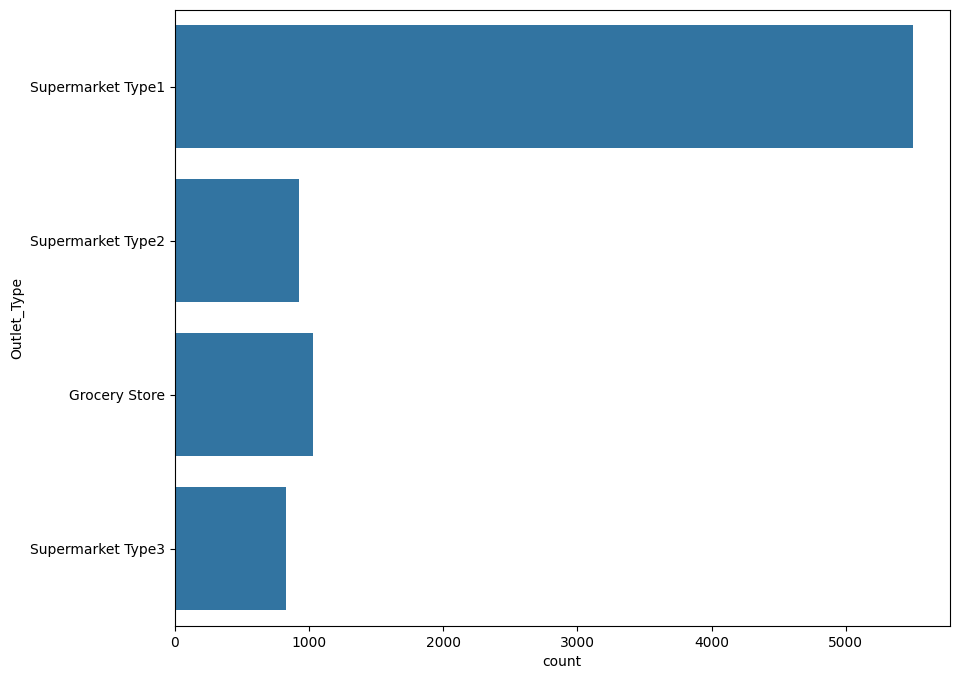

In [42]:
for i in categorical_df:
    plt.figure(figsize = (10,8))
    sns.countplot( y = i, data = bi_df);  

In [43]:
bi_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [44]:
bi_df['Item_Fat_Content'] = bi_df['Item_Fat_Content'].map({"low fat": "Low Fat",
                                                           "Low Fat": "Low Fat",
                                                         "LF":"Low Fat",
                                                         "Regular":"Regular",
                                                         "reg":"Regular"})

In [45]:
bi_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5359
Regular    2923
Name: count, dtype: int64

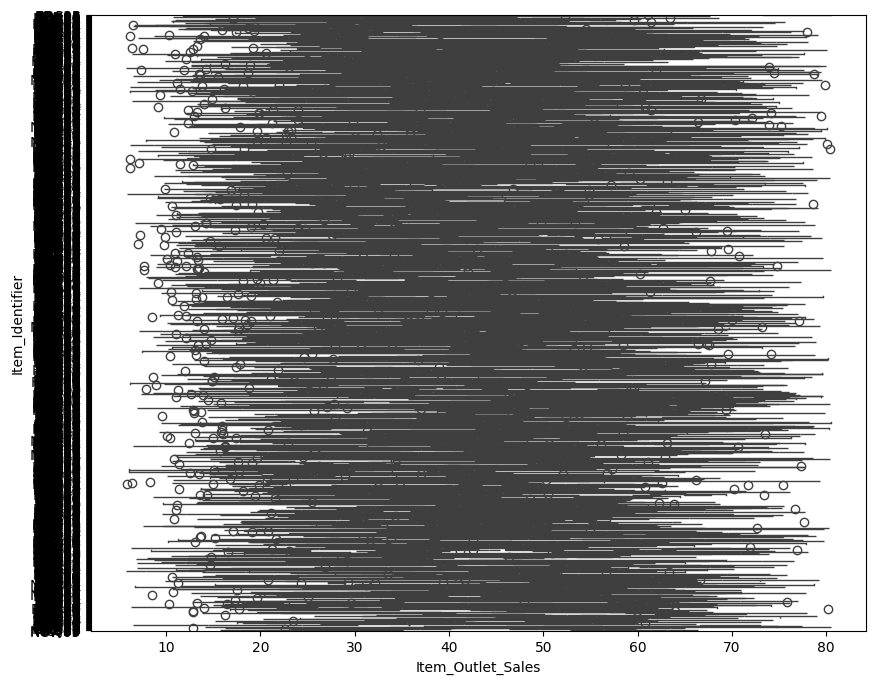

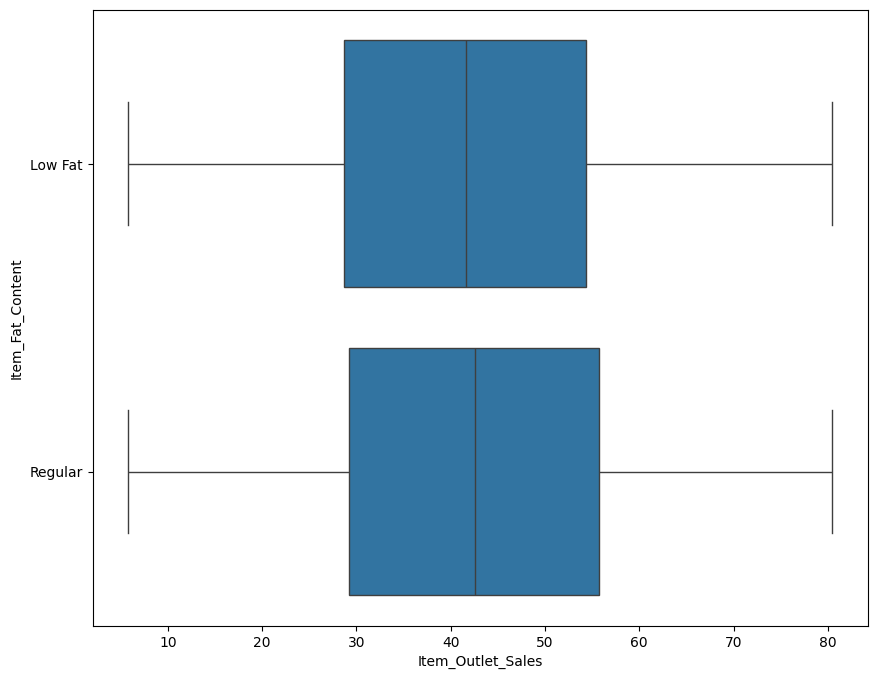

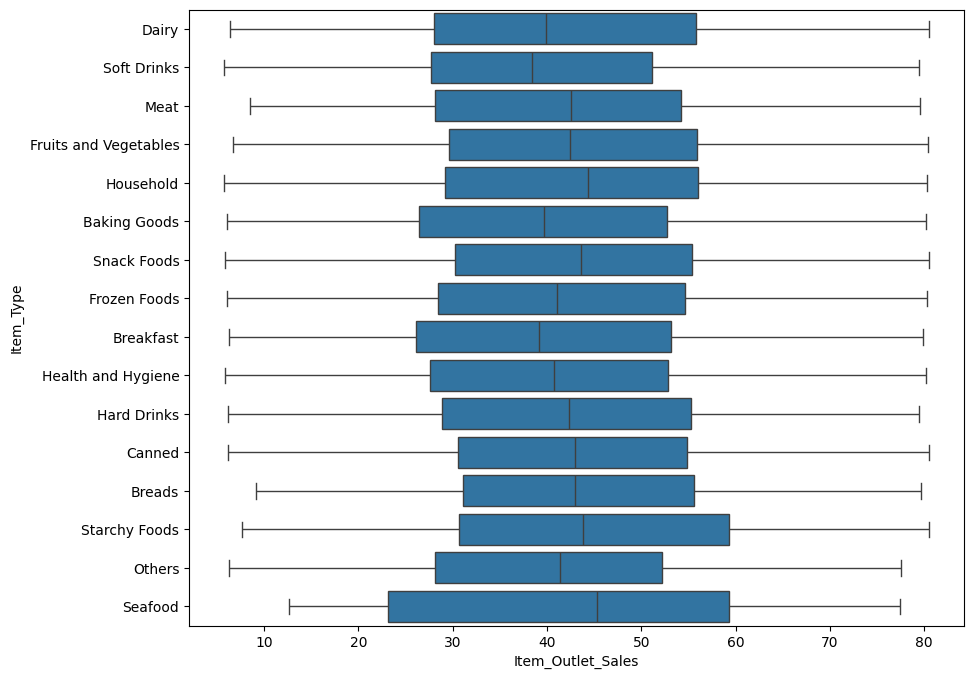

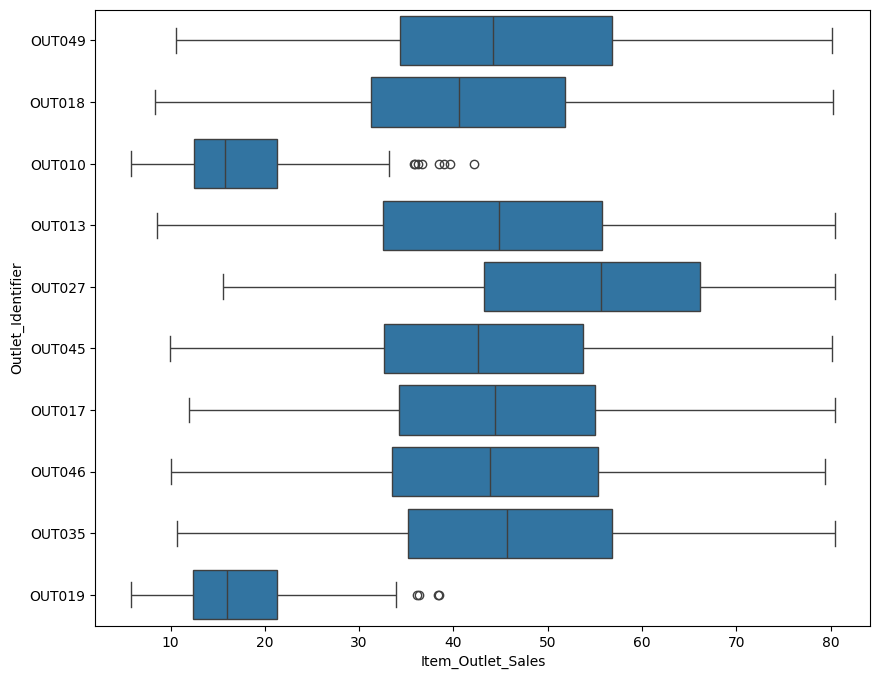

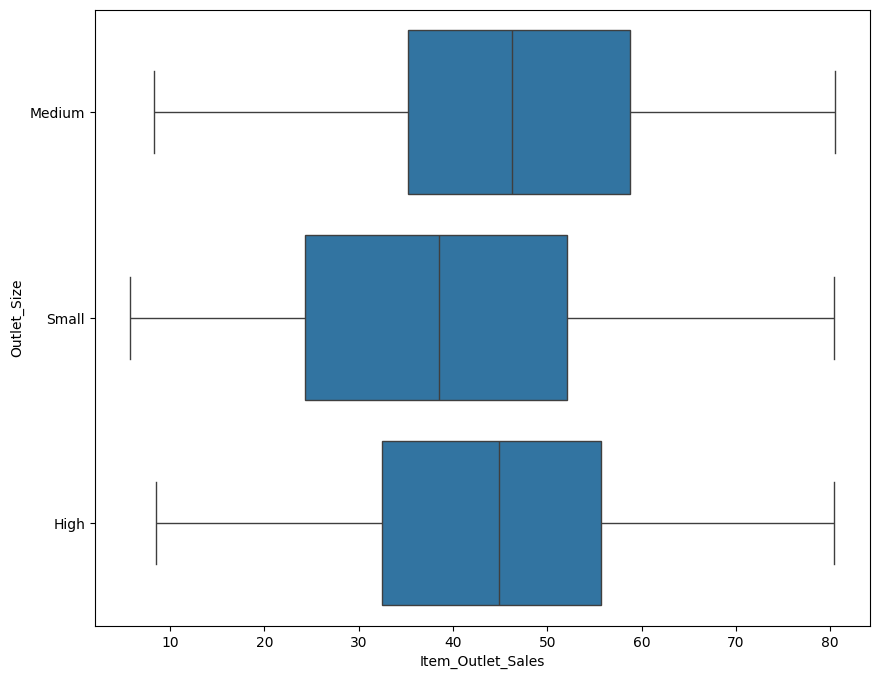

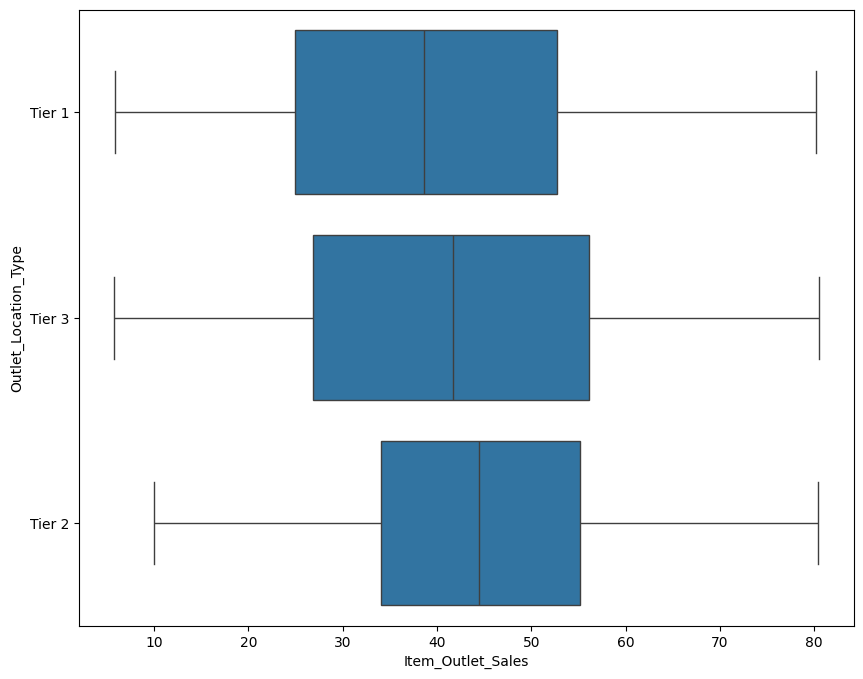

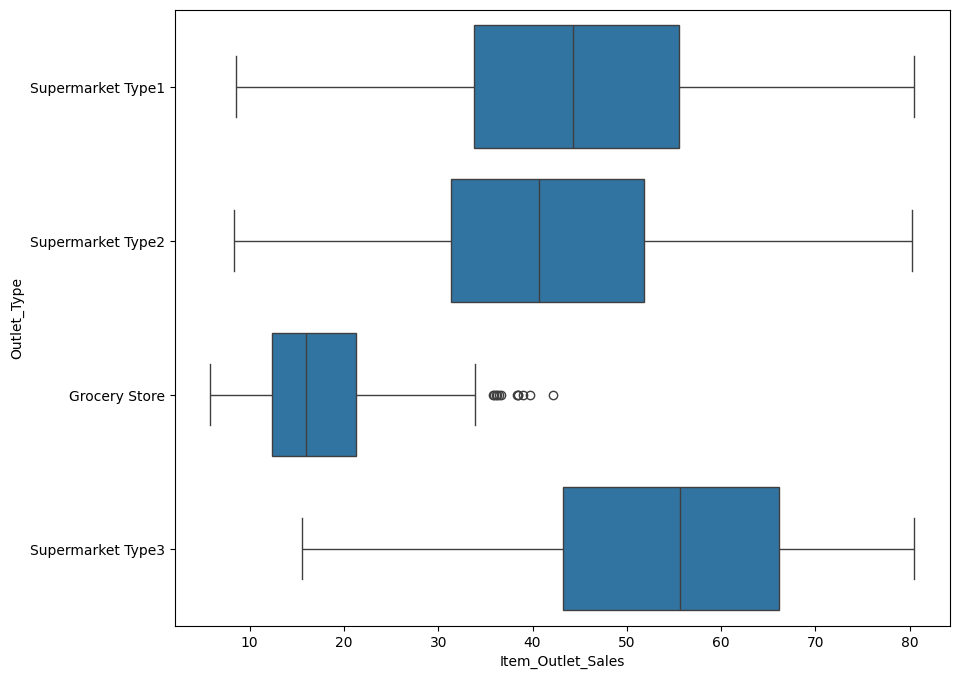

In [46]:
for i in categorical_df:
    plt.figure(figsize = (10,8))
    sns.boxplot( y = i, x = bi_df['Item_Outlet_Sales'],data = bi_df);

In [47]:
for i in numerical_df:
    print("\n")
    print(i)
    print("-" * 20)
    print("Skewness: %f" % bi_df[i].skew())
    print("Kurtosis: %f" % bi_df[i].kurt())
    print("-" * 20)



Item_Weight
--------------------
Skewness: 0.088212
Kurtosis: -0.890961
--------------------


Item_Visibility
--------------------
Skewness: 0.329221
Kurtosis: -0.513008
--------------------


Item_MRP
--------------------
Skewness: 0.150389
Kurtosis: -0.855955
--------------------


Outlet_Establishment_Year
--------------------
Skewness: -0.427368
Kurtosis: -1.154903
--------------------


Item_Outlet_Sales
--------------------
Skewness: 0.055352
Kurtosis: -0.767968
--------------------


In [48]:
tf_df = bi_df.copy()

In [49]:
categorical_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [50]:
# lets prepare the entity here , and if i open the config.yaml file where i can find the root_dir,status_file,unzip_data the same i do find in the class iside the DataValiadationConfig
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict # here all_Schema just read all the data and install inside the all_schema varaible as a dictionary formate

In [51]:
# in order to prepare my cofiguration manager in src config i need this below 2 packages 
from PROJECTML.constants import *
from PROJECTML.utils.common import read_yaml, create_directories

In [52]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath) # here iam reading these all like config,schema 
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

# then i will prepare my get_data_validation_config , so inside this iam returning all of the varaibles that i have deifined inside my entity 
    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation  # after reading by config iam returning the root_dir,status_file etc one by one
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig( # the above entity code is return type , and the below varaibles are getting return after reading by config varaible 
            root_dir=config.root_dir, 
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [53]:
import os
from PROJECTML import logger

In [54]:
class DataValiadtion: # this is components name 
    def __init__(self, config: DataValidationConfig): # it will take my DataValidationConfig
        self.config = config

# now iam below iam going to create validate_all_columns,this is a simple python program
    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir) # here iam reading the dataset
            all_cols = list(data.columns) # here iam list down all the columns,it will check or matches the schema.yaml file columns whether all the columns present in schema.yaml file columns  present or not 

            all_schema = self.config.all_schema.keys()

            # if those schema.yaml file columns are present it will return status as true, else it will returnt he status as false, then it will return one txt file inside the artifacts folder which theat txt file contains status decision true or false
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")

            return validation_status
        
        except Exception as e:
            raise e

In [59]:
try:
    config = ConfigurationManager() # here iam initializing my configuration manager
    data_validation_config = config.get_data_validation_config() # here iam getting my get_data_validation_config
    data_validation = DataValiadtion(config=data_validation_config) # then iam calling my DataValidation class and passing data_validation_config inside it
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2023-12-28 19:21:59,648: INFO: common: yaml file: config\config.yaml loaded successfully]
[2023-12-28 19:21:59,682: INFO: common: yaml file: schema.yaml loaded successfully]
[2023-12-28 19:21:59,689: INFO: common: created directory at: artifacts]
[2023-12-28 19:21:59,696: INFO: common: created directory at: artifacts/data_validation]
